# Figure 3. p63 motif classes and impact on activity.

In [4]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import os
import textwrap
#define useful functions
def wrap_labels(ax, width, break_long_words=False, rotation = 0):
	labels = []
	for label in ax.get_xticklabels():
		text = label.get_text()
		labels.append(textwrap.fill(text, width=width,
					  break_long_words=break_long_words))
	ax.set_xticklabels(labels, rotation=rotation)
#generate statannotations-compatable list of comparisons (1 constant var)
def stats_comp(x_list, hue_list, constant):
	l=[]
	for cl in x_list:
		for ty in hue_list:
			l.append([(cl,constant),(cl,ty)])
	return l
#generate statannotations-compatable list of comparisons
def stats_comp_pair(x_list, hue_list):
	l=[]
	for x in x_list:
		l.append([(x,hue_list[0]),(x,hue_list[1])])
	return l
def patch_violinplot():
    """Patch seaborn's violinplot in current axis to workaround matplotlib's bug ##5423."""
    from matplotlib.collections import PolyCollection
    ax = plt.gca()
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_edgecolor('black')
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10},
			  font='arial')
type_palette = {'Unique p63RE': sns.color_palette('flare')[-2], 'p53RE+p63RE':sns.color_palette('gnuplot')[-1]}
#import key tables
os.chdir('..\data')
fig_out_path = r'..\figures'
df = pd.read_excel('Table S3.xlsx', sheet_name='MCF10A_WT_p53KO')
df= df[df.p63RE_class != 'septary'] #there's only 4 of them
#add column to shorten labels for p63RE class, adds math expression to allow superscript & shorten axis tick labels
change_p53 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$'}
change_p63 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$', 'tertiary':'$\mathregular{3^{o}}$','quartenary':'$\mathregular{4^{o}}$',
			   'quinary':'$\mathregular{5^{o}}$','senary':'$\mathregular{6^{o}}$'}
comb = {**change_p53,**change_p63}
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])
df.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,class_labels
70942,chr11_125083161_125083185,shuffle,MCF10A p53KO,1.302937,Activating,20,primary,+,Unique p63RE,55.000000,NaN,$\mathregular{1^{o}}$
49283,chr15_47666287_47666301,fullShuffle,MCF10A,0.928569,Unchanged,8,secondary,+,p53RE+p63RE,46.666667,NaN,$\mathregular{2^{o}}$
33800,chr14_68104826_68104850,flankShuffle,MCF10A,0.278415,Activating,13,primary,-,Unique p63RE,38.333333,7.0,$\mathregular{1^{o}}$
46459,chr13_44790528_44790547,fullShuffle,MCF10A,2.189715,Unchanged,10,quinary,-,Unique p63RE,61.344538,NaN,$\mathregular{5^{o}}$
75331,chr20_33569993_33570007,shuffle,MCF10A p53KO,1.689787,Unchanged,12,secondary,-,p53RE+p63RE,55.833333,NaN,$\mathregular{2^{o}}$


## Figure 3B-C.
 - Import and merge p63 and p53 emrichment scores at p63RE elements

In [2]:
#Figure 3B-C. Need tables with MCF10A p63 ChIP-seq enrichemnt score
#CAREFUL HERE, not all enhancers have p53 or p63 enrichemnt in MCF10A ChIPseq dataseq
p63_chip = pd.read_csv('mcf10a_p53p63chromatin_enrichment_for_mpra.csv', usecols=['enhancer_variant', 'p63_log', 'p53_log','name', 'Cell.line'])
p63_chip.drop_duplicates(inplace=True)
p63_chip.rename(columns={'name':'loc', 'p63_log':'p63_enh_log2','p53_log':'p53_enh_log2'}, inplace=True)
p63_chip = p63_chip[(p63_chip.enhancer_variant == 'WT') & (p63_chip['Cell.line'] == 'MCF10A')]
p63_enrh = df[(df.cell_line == 'MCF10A') & (df.p63RE_type  == 'p53RE+p63RE') & (df.enhancer_variant == 'WT')].merge(p63_chip, how='left', on=['loc','enhancer_variant'])
#remove enhancers with no ChIP signal
p53_enr = p63_enrh[~p63_enrh.p53_enh_log2.isna()]
p63_enrh = p63_enrh[~p63_enrh.p63_enh_log2.isna()]
p63_enrh

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,class_labels,Cell.line,p63_enh_log2,p53_enh_log2
0,chr1_38117813_38117832,WT,MCF10A,1.681971,Activating,20,primary,+,p53RE+p63RE,57.983193,11.0,$\mathregular{1^{o}}$,MCF10A,12.909385,12.264083
1,chr1_40886808_40886827,WT,MCF10A,2.157630,Activating,20,primary,+,p53RE+p63RE,54.621849,16.0,$\mathregular{1^{o}}$,MCF10A,12.320982,12.454119
2,chr1_43582374_43582393,WT,MCF10A,0.908019,Unchanged,20,primary,+,p53RE+p63RE,57.142857,12.0,$\mathregular{1^{o}}$,MCF10A,12.631212,11.572807
3,chr1_64263404_64263423,WT,MCF10A,0.626343,Unchanged,20,primary,+,p53RE+p63RE,50.420168,NaN,$\mathregular{1^{o}}$,MCF10A,12.295633,10.578955
4,chr1_93593201_93593220,WT,MCF10A,1.046382,Activating,20,primary,-,p53RE+p63RE,52.100840,NaN,$\mathregular{1^{o}}$,MCF10A,12.484314,10.906516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,chr9_123418777_123418796,WT,MCF10A,2.913543,Activating,8,primary,+,p53RE+p63RE,60.504202,9.0,$\mathregular{1^{o}}$,MCF10A,8.669092,9.873102
4713,chr9_124863726_124863740,WT,MCF10A,1.117910,Unchanged,8,secondary,-,p53RE+p63RE,48.333333,NaN,$\mathregular{2^{o}}$,MCF10A,10.567582,11.113159
4714,chr9_129030385_129030404,WT,MCF10A,0.554650,Unchanged,8,primary,+,p53RE+p63RE,47.899160,NaN,$\mathregular{1^{o}}$,MCF10A,10.442308,10.007843
4715,chr9_131704288_131704302,WT,MCF10A,0.314781,Repressing,8,secondary,-,p53RE+p63RE,50.000000,NaN,$\mathregular{2^{o}}$,MCF10A,10.652126,10.092174


## Figure 3B

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.167e-04 U_stat=1.381e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:3.476e-01 U_stat=9.182e+04
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:6.607e-02 U_stat=1.578e+05


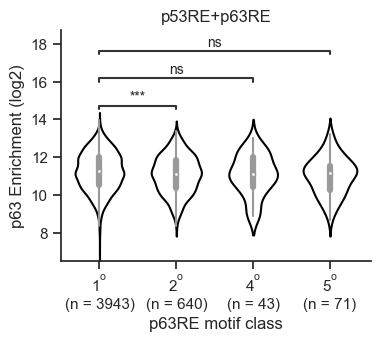

In [3]:
#Figure 3B
fig, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = p53_enr, x = 'class_labels',y = 'p63_enh_log2', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(
	ylim=(6.5, 16), title='p53RE+p63RE',ylabel = 'p63 Enrichment (log2)',xlabel='p63RE motif class')
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = p53_enr, x = 'class_labels',y = 'p63_enh_log2', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
patch_violinplot() #matplotlib bug fix
counts = p63_enrh.value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig.savefig(os.path.join(fig_out_path,'3B.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3C

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.394e-01 U_stat=1.308e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.900e-03 U_stat=1.081e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.618e-04 U_stat=1.739e+05


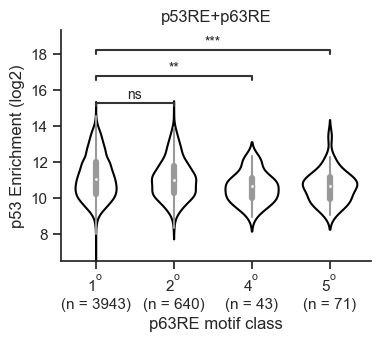

In [8]:
#Figure 3C
fig, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = p53_enr, x = 'class_labels',y = 'p53_enh_log2', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(
	ylim=(6.5, 16),ylabel = 'p53 Enrichment (log2)',xlabel='p63RE motif class', title='p53RE+p63RE')
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = p53_enr, x = 'class_labels',y = 'p53_enh_log2', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
patch_violinplot() #matplotlib bug fix
counts = p53_enr.value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig.savefig(os.path.join(fig_out_path,'3C.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3D

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:9.562e-29 Stat=5.090e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=7.638e+05
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:4.912e-01 Stat=4.350e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:8.117e-03 Stat=8.160e+02


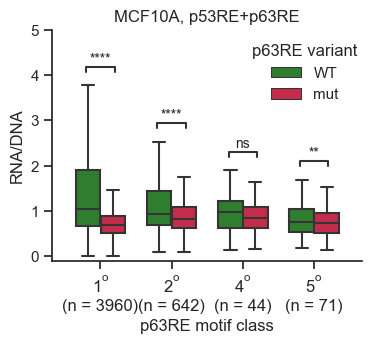

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p53.values(), ['WT','mut'])
df_both_mcf = df[(df.cell_line == 'MCF10A') & (df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_both_mcf, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A, p53RE+p63RE',ylim=(-0.1,5))
annotator = Annotator(pairs = compare, data = df_both_mcf, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6, 1))
#count number of enhancers and add to labels
counts = df_both_mcf[df_both_mcf.enhancer_variant == 'WT'].value_counts(subset='class_labels', ascending=False).to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig.savefig(os.path.join(fig_out_path,'3D.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3E

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:4.737e-19 Stat=6.127e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.158e-292 Stat=1.291e+06
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.342e-01 Stat=3.920e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.448e-01 Stat=1.075e+03


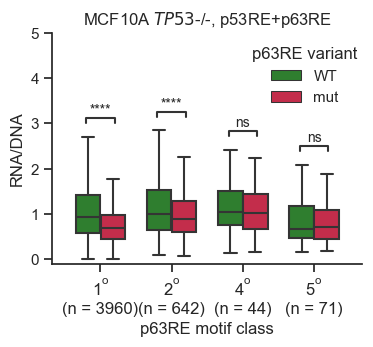

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p53.values(), ['WT','mut'])
df_both_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_both_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), width=0.7, palette = cols, 
			showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A $\it{TP53}$-/-, p53RE+p63RE',ylim=(-0.1,5))
annotator = Annotator(pairs = compare, data = df_both_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6, 1))
#count number of enhancers and add to labels
counts = df_both_ko[df_both_ko.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig.savefig(os.path.join(fig_out_path,'3E.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3G

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.374e-04 U_stat=1.011e+06
$\mathregular{1^{o}}$ vs. $\mathregular{3^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.032e-19 U_stat=1.170e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.087e-02 U_stat=1.291e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:6.738e-02 U_stat=2.743e+05
$\mathregular{1^{o}}$ vs. $\mathregular{6^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.773e-01 U_stat=1.818e+05


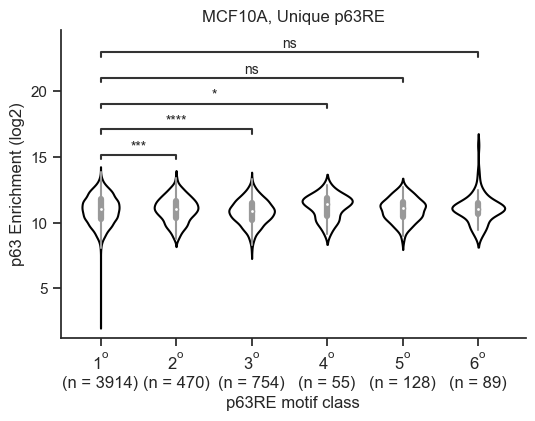

In [12]:
p63_enr_uniq = df[(df.cell_line == 'MCF10A') & (df.p63RE_type  == 'Unique p63RE') & (df.enhancer_variant == 'WT')].merge(p63_chip, how='left', on=['loc','enhancer_variant'])

fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(data = p63_enr_uniq, x = 'class_labels',y = 'p63_enh_log2', order=change_p63.values(),
			   width=0.7, color= 'white',  ax = ax).set(title = 'MCF10A, Unique p63RE',
				xlabel='p63RE motif class',ylabel='p63 Enrichment (log2)')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{3^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{6^{o}}$')]
annotator = Annotator(pairs = compare, data = p63_enr_uniq, x = 'class_labels',y = 'gc', order=change_p63.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
counts = p63_enr_uniq[p63_enr_uniq.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig.savefig(os.path.join(fig_out_path,'3G.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3H

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.271e-06 Stat=4.107e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:3.096e-27 Stat=3.067e+06
$\mathregular{3^{o}}$_WT vs. $\mathregular{3^{o}}$_mut: Wilcoxon test (paired samples), P_val:3.236e-10 Stat=1.047e+05
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.619e-02 Stat=4.830e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:6.721e-01 Stat=3.950e+03
$\mathregular{6^{o}}$_WT vs. $\mathregular{6^{o}}$_mut: Wilcoxon test (paired samples), P_val:8.204e-01 Stat=1.947e+03


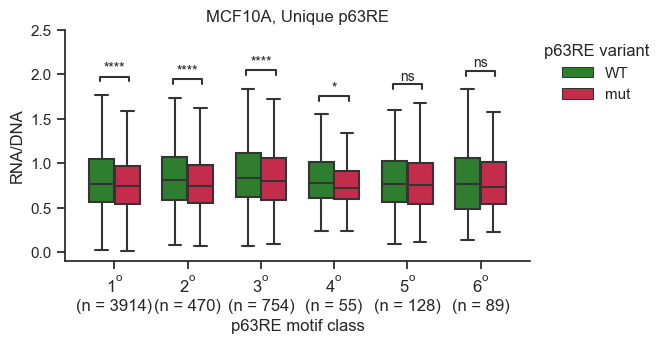

In [13]:
fig, ax = plt.subplots(figsize=(6,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p63.values(), ['WT','mut'])
df_p63 = df[(df.cell_line == 'MCF10A') & (df.p63RE_type == 'Unique p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_p63, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A, Unique p63RE',ylim=(-0.1,2.5))
annotator = Annotator(pairs = compare, data = df_p63, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_p63[df_p63.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig.savefig(os.path.join(fig_out_path,'3H.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3H

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.433e-05 Stat=4.256e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:6.244e-57 Stat=2.707e+06
$\mathregular{3^{o}}$_WT vs. $\mathregular{3^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.790e-11 Stat=1.025e+05
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.048e-04 Stat=3.070e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:7.428e-01 Stat=3.990e+03
$\mathregular{6^{o}}$_WT vs. $\mathregular{6^{o}}$_mut: Wilcoxon test (paired samples), P_val:9.202e-01 Stat=1.978e+03


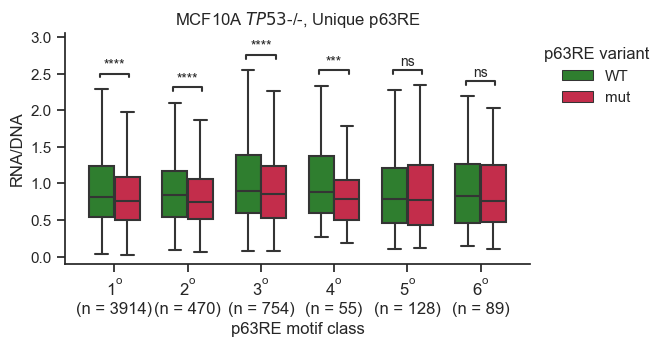

In [15]:
fig, ax = plt.subplots(figsize=(6,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p63.values(), ['WT','mut'])
df_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.p63RE_type == 'Unique p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), width=0.7, palette = cols,
			showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A $\it{TP53}$-/-, Unique p63RE',ylim=(-0.1,2.55))
annotator = Annotator(pairs = compare, data = df_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_ko[df_ko.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig.savefig(os.path.join(fig_out_path,'3I.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3J.
 - Process sequences to calculate dinucelotide frequency for these enhancers

In [16]:
#calculate dinucelotide frequency
import warnings
warnings.filterwarnings('ignore')
#create all possible dinucleotide combinations
dinucleotides = []
for n in ['A','T','G','C']:
	for u in ['A','T','G','C']:
		dinucleotides.append(n + u)
#import and process tables that have enh id and seq
df_ko = df[(df.enhancer_variant == 'WT') & (df.cell_line == 'MCF10A p53KO')]
df_seqs = pd.read_csv('p63enh_starrseq_info_long.csv', usecols=['seq','loc', 'enhancer_variant'])
df_seqs = df_seqs[df_seqs.enhancer_variant == 'WT']
df_ko = df_ko.merge(df_seqs, how='left', on='loc')
df_ko.seq = df_ko.seq.str.upper()
def count_dint(seq):
	d = {}
	for dint in dinucleotides:
		d.update({dint: seq.count(dint)})
	return d
df_ko[dinucleotides] = df_ko.apply(lambda row: count_dint(row.seq), axis=1, result_type="expand")
df_freq = df_ko.copy()
df_freq['len/2'] = df_freq.seq.apply(lambda x: len(x)/2)
df_freq[dinucleotides] = df_freq[dinucleotides].div(df_freq['len/2'].values, axis='index')
long = df_freq.melt(id_vars = ['p63RE_type', 'loc'], value_vars = dinucleotides, var_name = 'dinucleotide', value_name = 'frequency')
long

,p63RE_type,loc,dinucleotide,frequency
0,Unique p63RE,chr1_3717092_3717116,AA,0.116667
1,Unique p63RE,chr1_31575754_31575773,AA,0.100840
2,p53RE+p63RE,chr1_38117813_38117832,AA,0.067227
3,p53RE+p63RE,chr1_40886808_40886827,AA,0.050420
4,Unique p63RE,chr1_42941183_42941207,AA,0.066667
...,...,...,...,...
162027,Unique p63RE,chr9_132993510_132993534,CC,0.083333
162028,p53RE+p63RE,chr9_135016437_135016456,CC,0.117647
162029,Unique p63RE,chr9_136533879_136533893,CC,0.150000
162030,Unique p63RE,chr9_137062571_137062595,CC,0.100000


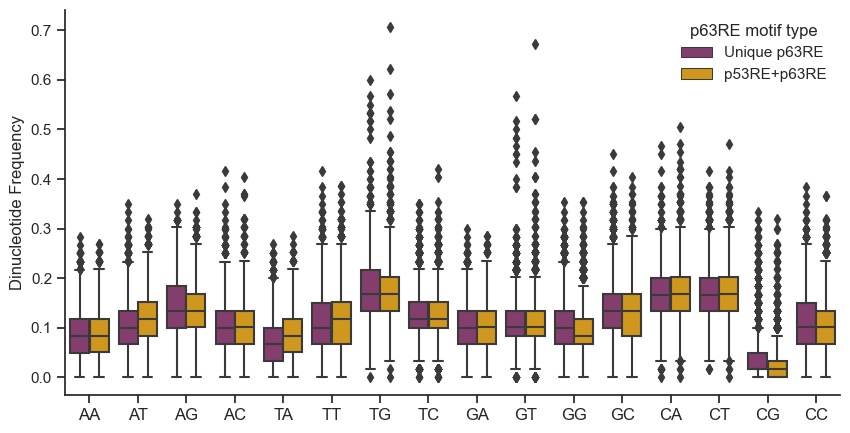

In [17]:
fig, ax =  plt.subplots(figsize=(10,5))
sns.boxplot(data=long, x='dinucleotide', y='frequency', hue='p63RE_type',palette=type_palette,ax = ax).set(ylabel='Dinucleotide Frequency', xlabel=None)
sns.move_legend(ax, "upper right", frameon=False, title = 'p63RE motif type')
fig.savefig(os.path.join(fig_out_path,'3J.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3k
 - Show GC skew across the enhancer region

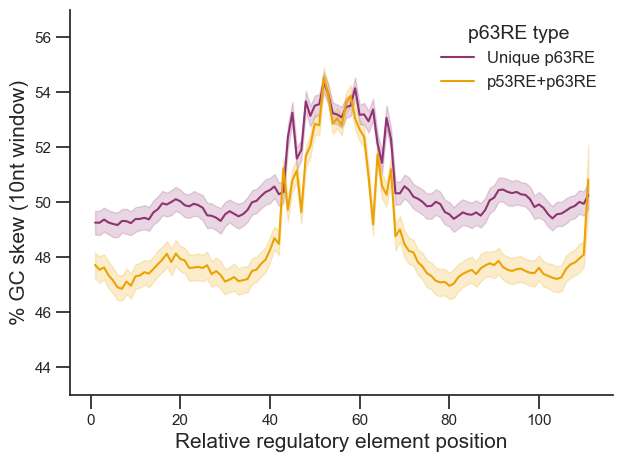

In [17]:
#draw GC skew accross enhacner
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':12,
								"axes.labelsize":15,"xtick.major.size":10, "ytick.major.size":10},font='arial')
gc = pd.read_csv('..\data\p63enh_starrseq_gcskew_matched_MCF10Ap53KO.csv', index_col=0)
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=gc, x='position', y='GC_skew', hue='p63RE_type',ax=ax, palette=type_palette).set(ylabel = '% GC skew (10nt window)', xlabel = 'Relative regulatory element position', ylim=(43, 57))
sns.move_legend(ax, "upper right", frameon=False, title = 'p63RE type', fontsize=12, title_fontsize=14)
fig.savefig(os.path.join(fig_out_path,'3K.pdf'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3L

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.374e-04 U_stat=1.011e+06
$\mathregular{1^{o}}$ vs. $\mathregular{3^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.032e-19 U_stat=1.170e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.087e-02 U_stat=1.291e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:6.738e-02 U_stat=2.743e+05
$\mathregular{1^{o}}$ vs. $\mathregular{6^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.773e-01 U_stat=1.818e+05


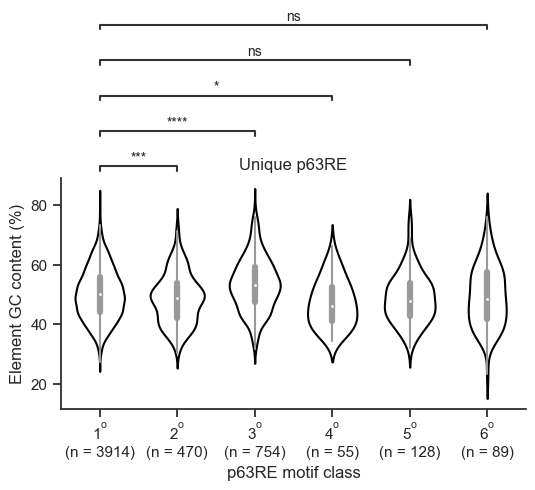

In [6]:
df_mcf_wt_p63 = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT') & (df.p63RE_type != 'p53RE+p63RE')]
fig, ax = plt.subplots(figsize=(6,3))
sns.violinplot(data = df_mcf_wt_p63, x = 'class_labels',y = 'gc', order=change_p63.values(), width=0.7, color= 'white',
			   ax = ax).set(title = 'Unique p63RE',xlabel='p63RE motif class',ylabel='Element GC content (%)')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{3^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{6^{o}}$')]
annotator = Annotator(pairs = compare, data = df_mcf_wt_p63, x = 'class_labels',y = 'gc', order=change_p63.values(), ax = ax)
annotator.configure(test = "Mann-Whitney", loc='outside').apply_and_annotate()
counts = df_mcf_wt_p63[df_mcf_wt_p63.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig.savefig(os.path.join(fig_out_path,'3L.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 3M

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.787e-58 U_stat=7.687e+05
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:9.952e-05 U_stat=5.746e+04
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.386e-01 U_stat=1.331e+05


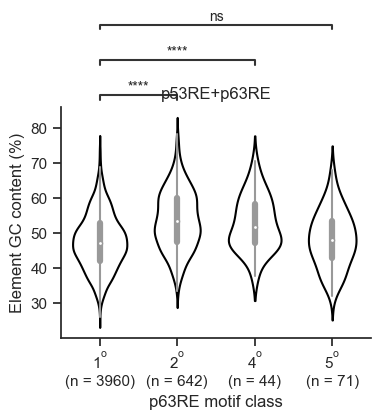

In [7]:
df_mcf_wt_p53 = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT') & (df.p63RE_type == 'p53RE+p63RE')]
fig, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = df_mcf_wt_p53, x = 'class_labels',y = 'gc', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(title = 'p53RE+p63RE', ylabel = 'Element GC content (%)',xlabel='p63RE motif class')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = df_mcf_wt_p53, x = 'class_labels',y = 'gc', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney", loc='outside').apply_and_annotate()
counts = df_mcf_wt_p53[df_mcf_wt_p53.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig.savefig(os.path.join(fig_out_path,'3M.eps'), dpi=300, transparent=True, bbox_inches='tight')